In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the TensorBoard notebook extension

In [10]:
df = pd.read_csv('all.csv', header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [12]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


0       0
1       0
2       0
3       0
4       0
       ..
2995    9
2996    9
2997    9
2998    9
2999    9
Name: 784, Length: 3000, dtype: int64

In [16]:
X = X.to_numpy()

In [17]:
y = y.to_numpy()

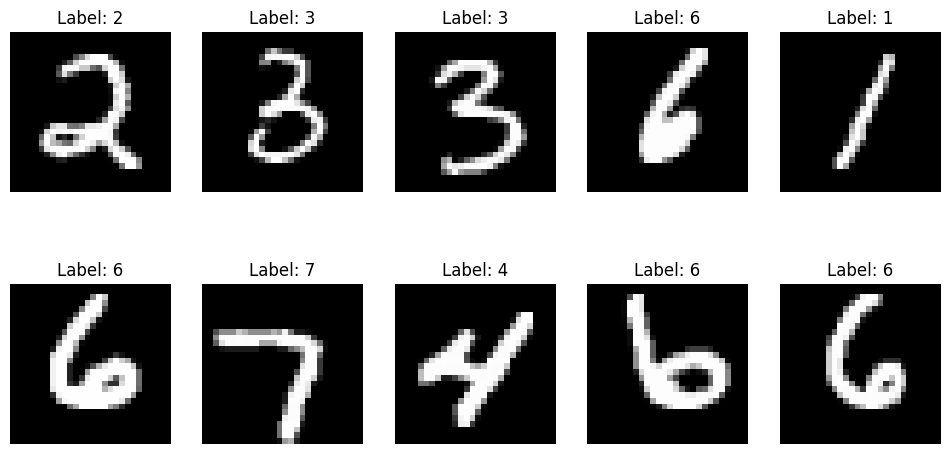

In [20]:


# Plot first 10 images with labels
plt.figure(figsize=(12, 6))
for i in range(10):
    r = np.random.randint(0,2500)
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[r, :].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y[r]}")
    plt.axis('off')

plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [23]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [24]:
np.shape(x_train)

(2400, 784)

In [26]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model2= tf.keras.models.Sequential([
  tf.keras.layers.Dense(784,activation='relu'),

tf.keras.layers.Dense(256),

tf.keras.layers.Dense(128)
])
activations = model2.predict(x_train)

75/75 [==============================] - 0s 3ms/step


In [ ]:
activations.shape

(2400, 128)

In [ ]:
model2.evaluate(x_test,  y_test, verbose=2)

19/19 - 0s - loss: 0.3224 - accuracy: 0.9350 - 356ms/epoch - 19ms/step


[0.3224104344844818, 0.9350000023841858]

Epoch 1/10
75/75 [==============================] - 2s 14ms/step - loss: 0.6384 - accuracy: 0.7971
Epoch 2/10
75/75 [==============================] - 1s 13ms/step - loss: 0.2020 - accuracy: 0.9396
Epoch 3/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0965 - accuracy: 0.9708
Epoch 4/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0486 - accuracy: 0.9879
Epoch 5/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0418 - accuracy: 0.9862
Epoch 6/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0286 - accuracy: 0.9900
Epoch 7/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 8/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 9/10
75/75 [==============================] - 1s 13ms/step - loss: 8.3786e-04 - accuracy: 1.0000
Epoch 10/10
75/75 [==============================] - 2s 22ms/step - loss: 5.9745e-04 - accuracy: 1.0000
1

[0.32408109307289124, 0.9316666722297668]

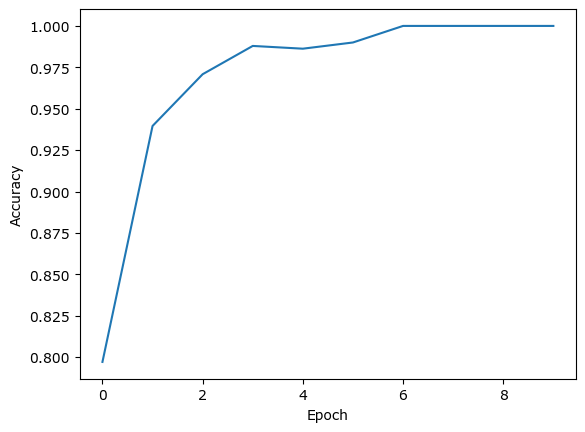

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784,activation='relu'),


  tf.keras.layers.Dense(784),

  #tf.keras.layers.Dense(128),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['speed'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
75/75 [==============================] - 2s 16ms/step - loss: 0.6597 - accuracy: 0.7954
Epoch 2/10
75/75 [==============================] - 1s 17ms/step - loss: 0.1816 - accuracy: 0.9442
Epoch 3/10
75/75 [==============================] - 1s 16ms/step - loss: 0.0822 - accuracy: 0.9779
Epoch 4/10
75/75 [==============================] - 1s 16ms/step - loss: 0.0487 - accuracy: 0.9867
Epoch 5/10
75/75 [==============================] - 1s 16ms/step - loss: 0.0270 - accuracy: 0.9925
Epoch 6/10
75/75 [==============================] - 1s 16ms/step - loss: 0.0379 - accuracy: 0.9871
Epoch 7/10
75/75 [==============================] - 1s 16ms/step - loss: 0.0232 - accuracy: 0.9933
Epoch 8/10
75/75 [==============================] - 1s 16ms/step - loss: 0.0103 - accuracy: 0.9975
Epoch 9/10
75/75 [==============================] - 1s 15ms/step - loss: 0.0028 - accuracy: 0.9996
Epoch 10/10
75/75 [==============================] - 1s 16ms/step - loss: 7.2940e-04 - accuracy: 1.0000
19/19

[0.34300026297569275, 0.9366666674613953]

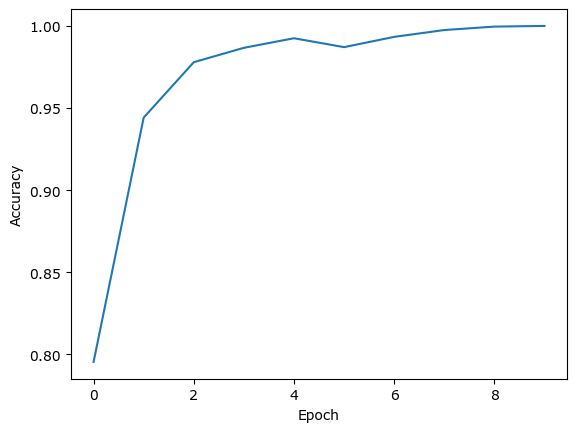

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784,activation='relu'),


  tf.keras.layers.Dense(1024),

  #tf.keras.layers.Dense(128),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['speed'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
75/75 [==============================] - 2s 9ms/step - loss: 0.6523 - accuracy: 0.7912
Epoch 2/10
75/75 [==============================] - 1s 9ms/step - loss: 0.2665 - accuracy: 0.9192
Epoch 3/10
75/75 [==============================] - 1s 9ms/step - loss: 0.1524 - accuracy: 0.9538
Epoch 4/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0693 - accuracy: 0.9800
Epoch 5/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0276 - accuracy: 0.9921
Epoch 6/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0152 - accuracy: 0.9962
Epoch 7/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0189 - accuracy: 0.9950
Epoch 8/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0283 - accuracy: 0.9908
Epoch 9/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0764 - accuracy: 0.9800
Epoch 10/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0617 - accuracy: 0.9792
19/19 - 0s - loss:

[0.44046446681022644, 0.9133333563804626]

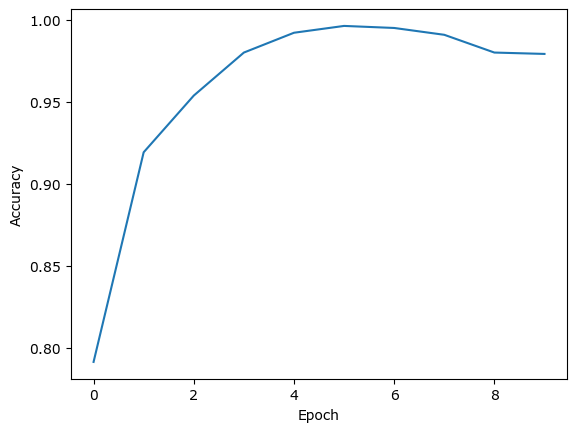

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784,activation='relu'),


  tf.keras.layers.Dense(256),

  tf.keras.layers.Dense(128),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['speed'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
75/75 [==============================] - 2s 13ms/step - loss: 0.6774 - accuracy: 0.7896
Epoch 2/10
75/75 [==============================] - 1s 13ms/step - loss: 0.2347 - accuracy: 0.9229
Epoch 3/10
75/75 [==============================] - 1s 13ms/step - loss: 0.1145 - accuracy: 0.9629
Epoch 4/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0619 - accuracy: 0.9792
Epoch 5/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0621 - accuracy: 0.9821
Epoch 6/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0558 - accuracy: 0.9825
Epoch 7/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0375 - accuracy: 0.9867
Epoch 8/10
75/75 [==============================] - 1s 12ms/step - loss: 0.0195 - accuracy: 0.9921
Epoch 9/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0098 - accuracy: 0.9962
Epoch 10/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0474 - accuracy: 0.9883
19/19 - 0

[0.570611834526062, 0.903333306312561]

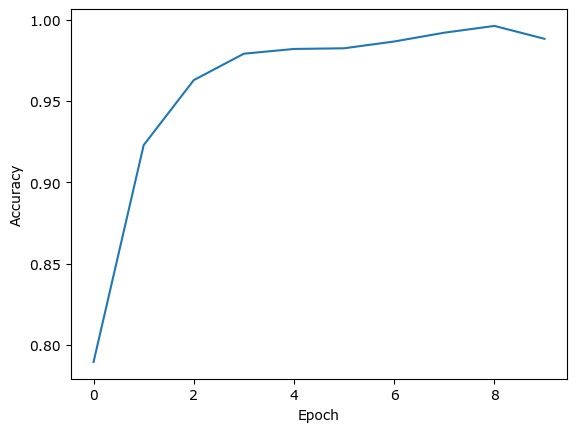

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784,activation='relu'),


  tf.keras.layers.Dense(516),

  tf.keras.layers.Dense(256),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['speed'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
75/75 [==============================] - 1s 5ms/step - loss: 0.6822 - accuracy: 0.7850
Epoch 2/10
75/75 [==============================] - 0s 5ms/step - loss: 0.2622 - accuracy: 0.9171
Epoch 3/10
75/75 [==============================] - 0s 5ms/step - loss: 0.1173 - accuracy: 0.9650
Epoch 4/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0646 - accuracy: 0.9821
Epoch 5/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0276 - accuracy: 0.9921
Epoch 6/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.9896
Epoch 7/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.9958
Epoch 8/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0265 - accuracy: 0.9946
Epoch 9/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0238 - accuracy: 0.9929
Epoch 10/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0273 - accuracy: 0.9937
19/19 - 0s - loss: 

[0.44958731532096863, 0.9133333563804626]

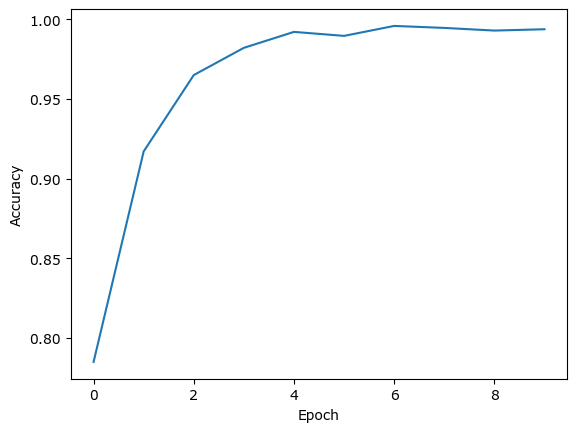

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784,activation='relu'),


  tf.keras.layers.Dense(128),

  tf.keras.layers.Dense(128),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['speed'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
75/75 [==============================] - 2s 9ms/step - loss: 0.6956 - accuracy: 0.7837
Epoch 2/10
75/75 [==============================] - 1s 9ms/step - loss: 0.2776 - accuracy: 0.9150
Epoch 3/10
75/75 [==============================] - 1s 9ms/step - loss: 0.1568 - accuracy: 0.9542
Epoch 4/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0851 - accuracy: 0.9746
Epoch 5/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0435 - accuracy: 0.9871
Epoch 6/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 7/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0169 - accuracy: 0.9962
Epoch 8/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0204 - accuracy: 0.9933
Epoch 9/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0286 - accuracy: 0.9908
Epoch 10/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0562 - accuracy: 0.9854
19/19 - 0s - loss: 

[0.5374351739883423, 0.9066666960716248]

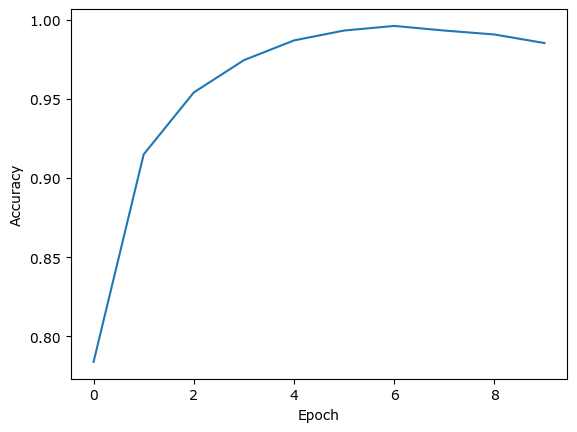

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784,activation='relu'),


  tf.keras.layers.Dense(200),

  tf.keras.layers.Dense(100),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['speed'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784),
  tf.keras.layers.Dense(256, activation='relu'),

  #tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=15)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

19/19 - 0s - loss: 0.5791 - accuracy: 0.8617 - 79ms/epoch - 4ms/step


[0.5790879726409912, 0.8616666793823242]

In [ ]:
plt.imshow(X[])

In [ ]:
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
z = X.to_numpy()
z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
k = z[10,:]

TypeError: Invalid shape (784,) for image data

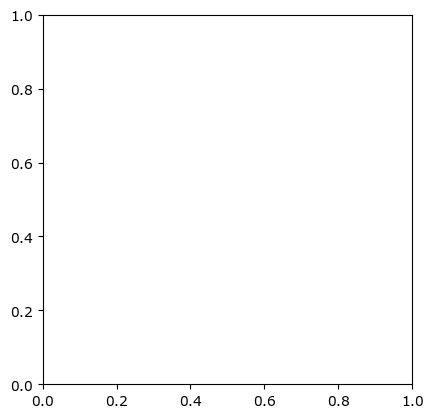

In [ ]:
plt.imshow(k)